# <center> Lab 02 Part 1: Multiple Regression, Regularised Regression<br> <small>Réda DEHAK<br> 17 Mai 2021</small> </center>


The goal of this lab is :

    - Fit generalised linear models with ridge or Lasso regularisations

## Part 1: Regularised Regression 
### Import Data

The following dataset is from Hastie, Tibshirani and Friedman (2009), from a study by Stamey et al. (1989) of prostate cancer, measuring the correlation between the level of a prostate-specific antigen and some covariates. The covariates are
- lcavol : log-cancer volume
-  lweight : log-prostate weight
-  age : age of patient
-  lbhp : log-amount of benign hyperplasia
-  svi : seminal vesicle invasion
-  lcp : log-capsular penetration
-  gleason : Gleason Score,
-  lpsa is the response variable, log-psa.

In [1]:
%pylab
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
fin = open('data2.pkl', 'rb')
xtrain = pickle.load(fin)
ytrain = pickle.load(fin)
Xtest = pickle.load(fin)
Ytest = pickle.load(fin)
fin.close()

print('Train data : ', xtrain.shape, ' ', ytrain.shape)
print('Test data : ', Xtest.shape, ' ', Ytest.shape)

Train data :  (7, 60)   (60,)
Test data :  (7, 37)   (37,)


### Linear Regression

Using the program of TP 1, compute the linear regression weight $w$

$$y = g(x) = W^T x =\sum_{d=0}^7 w_d x_d$$
with $x_0 = 1$

The linear regression consists in finding the parameters $W$ which minimizes the 
quadratic error:
$$E(W) = \frac{1}{60}\sum_{i=1}^{60}\left(g(x_i) - y_i\right)^2$$

The vector $W$ which minimize $E(W)$ is defined as follow:
$$W = (X X^T)^{-1}X Y$$

Compute the vector $W$ wich minimize $E(W)$ :
- Compute $w$ using the exact solution
- Compute the error on test data

In [4]:
X = np.vstack((np.ones(xtrain.shape[1]), xtrain))
XXT = X @ X.T
W = np.linalg.inv(XXT) @ X @ ytrain
print(W)

[-1.37427705  0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121
 -0.08828183  0.38558413]


- Check that you obtain the same $W$ with sklean.linear_model.LinearRegression?

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain.T, ytrain.reshape((60, 1)))
print("A = ", reg.coef_)

A =  [[ 0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121 -0.08828183
   0.38558413]]


### Ridge regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_2^2$$ 

- Using linear_model.Ridge and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [8]:
lridge = linear_model.Ridge(alpha = 0.)
lridge.fit(xtrain.T, ytrain)
print("W =", lridge.coef_)
e = np.mean((lridge.predict(Xtest.T) - Ytest) ** 2)
print("Erreur = ", e)

W = [ 0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121 -0.08828183
  0.38558413]
Erreur =  2.864149965701439


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a ridge regression with different values of $\alpha$ = np.logspace(-5, 5, 200), save the values of W, Mean squared errors on train and test data.

In [9]:
alphas = np.logspace(-5, 5, 200)
e=[]
w=[]
for a in alphas:
    rr = linear_model.Ridge(alpha=a)
    rr.fit(xtrain.T, ytrain)
    yp = rr.predict(xtrain.T)
    etrain = np.mean((ytrain - yp)**2)
    ytp = rr.predict(Xtest.T)
    etest = np.mean((Ytest - ytp)**2)
    e.append(np.array([etrain, etest]))
    w.append(rr.coef_)

e=np.array(e).T
w=np.array(w).T

- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.

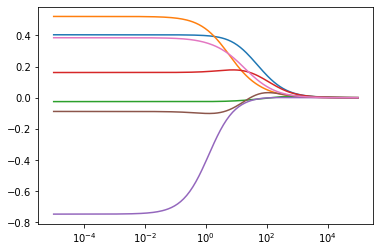

In [10]:
for i in range(7):
    plt.semilogx(alphas, w[i, :])

plt.show()

- Plot how evolve the mean square error on train and test data through the sequence of $\alpha$ values.

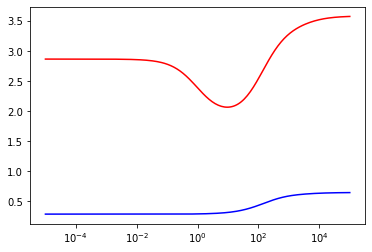

In [11]:
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[0, :], color = 'blue')
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[1, :], color = 'red')

plt.show()

- Conclude? (Which is the best value for $\alpha$)

La bonne valeur de alpha se trouve vers 10, a gauche de 10 overfitting, a droite underfitting

### Lasso regression

The ridge regression consists in finding the parameters $W$ which minimizes:
$$\frac{1}{2 \times 60}\sum_{i=1}^{60}\left(W^T x_i - y_i\right)^2 + \alpha \|W\|_1$$

- Using linear_model.Lasso and $\alpha = 0.$, check that you obtain the same $W$ as linear regression

In [12]:
ll = linear_model.Lasso(alpha = 0.)
ll.fit(xtrain.T, ytrain)
print("W =", ll.coef_)
e = np.mean((ll.predict(Xtest.T) - Ytest) ** 2)
print("Erreur = ", e)

W = [ 0.40461954  0.52246673 -0.02499738  0.16200821 -0.74830121 -0.08828183
  0.38558413]
Erreur =  2.8641499657014413


<ipython-input-12-fc82d469dd6c>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ll.fit(xtrain.T, ytrain)
/home/hao/Documents/jupyter/INIA/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/hao/Documents/jupyter/INIA/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.633246593799855, tolerance: 0.003881537381634925
  model = cd_fast.enet_coordinate_descent(


In this part, we will check the influence of $\alpha$ on the solution of the linear regression

- Train a Lasso regression with different values of $\alpha$ = np.logspace(-5, 5, 200), save the values of W, Mean squared errors on train and test data.

In [15]:
alphas = np.logspace(-5, 5, 200)
e=[]
w=[]
for a in alphas:
    ll = linear_model.Lasso(alpha=a)
    ll.fit(xtrain.T, ytrain)
    yp = ll.predict(xtrain.T)
    etrain = np.mean((ytrain - yp)**2)
    ytp = ll.predict(Xtest.T)
    etest = np.mean((Ytest - ytp)**2)
    e.append(np.array([etrain, etest]))
    w.append(ll.coef_)

e=np.array(e).T
w=np.array(w).T

- Plot how evolve each $W_i$ through the sequence of $\alpha$ values.

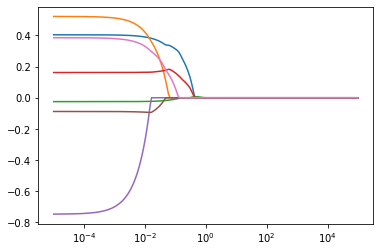

In [16]:
for i in range(7):
    plt.semilogx(alphas, w[i, :])

plt.show()

- Plot how evolve the mean square error on train and test data through the sequence of $\alpha$ values.

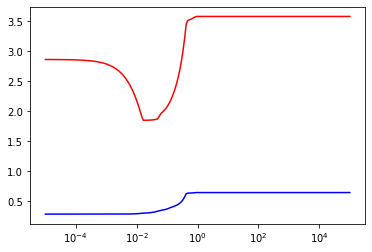

In [17]:
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[0, :], color = 'blue')
# Plot Mean Squared Error on train data
plt.semilogx(alphas, e[1, :], color = 'red')

plt.show()

- Conclude? (Which is the best value for $\alpha$)

La bonne valeur de alpha est 10^-2, a gauche de la bonne valeur on est en overfitting, a droite on est en underfitting

Compare the result with ridge solution?